# Importing Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


## Reading dataset

In [7]:
data = pd.read_csv("cars_price (1).csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [8]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Null value checking

In [9]:
# replacing the ? with nan values in entire dataset
data.replace("?",np.nan,inplace = True)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [10]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
data["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
data["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
data["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [12]:
# finding mean of normalized-losses column
n_mean = data["normalized-losses"].astype("float").mean()
n_mean

122.0

In [13]:
# replacing the nan values with mean 
data["normalized-losses"] = data["normalized-losses"].replace(np.nan,n_mean)


In [14]:
# finding mean of bore column
b_mean = data["bore"].astype("float").mean()
b_mean

3.3297512437810957

In [15]:
# replacing the nan values with mean
data["bore"] = data["bore"].replace(np.nan,b_mean)

In [16]:
# finding mean of stroke column
s_mean = data["stroke"].astype("float").mean()
s_mean

3.2554228855721337

In [17]:
# replacing the nan values with mean
data["stroke"] = data["stroke"].replace(np.nan,s_mean)

In [18]:
# finding mean of horsepower column
h_mean = data["horsepower"].astype("float").mean()
h_mean

104.25615763546799

In [19]:
# replacing the nan values with mean
data["horsepower"] = data["horsepower"].replace(np.nan,h_mean)

In [20]:
# finding mean of peak-rpm column
p_mean = data["peak-rpm"].astype("float").mean()
p_mean

5125.369458128079

In [21]:
# replacing the nan values with mean
data["peak-rpm"] = data["peak-rpm"].replace(np.nan,p_mean)

In [22]:
# finding mean of price column
price_mean = data["price"].astype("float").mean()
price_mean

13207.129353233831

In [23]:
# replacing the nan values with mean
data["price"] = data["price"].replace(np.nan, price_mean)

Above columns are numerical columns so we use mean value to replace it

In [24]:
data["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [25]:
# usinf most frequent value to replace the nan values
data["num-of-doors"] = data["num-of-doors"].replace(np.nan, "four")

In [26]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Exploratory Data Analysis

In [27]:
f_type = data["fuel-type"].value_counts().to_frame().reset_index()
f_type.columns=["fuel_type","counts"]
f_type

,fuel_type,counts
0,gas,185
1,diesel,20


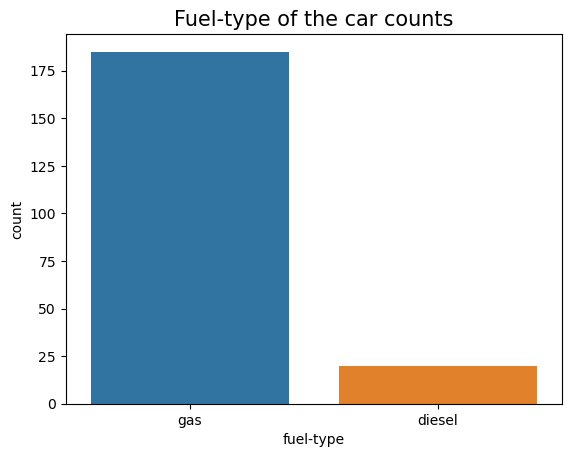

In [28]:
sns.countplot(x=data["fuel-type"])
plt.title("Fuel-type of the car counts",fontsize = 15)
plt.show()

### Gas fuel type car is more in number

In [21]:
n_cylinder = data["num-of-cylinders"].value_counts().to_frame().reset_index()
n_cylinder.columns=["num-of-cylinders","counts"]
n_cylinder

,num-of-cylinders,counts
0,four,159
1,six,24
2,five,11
3,eight,5
4,two,4
5,three,1
6,twelve,1


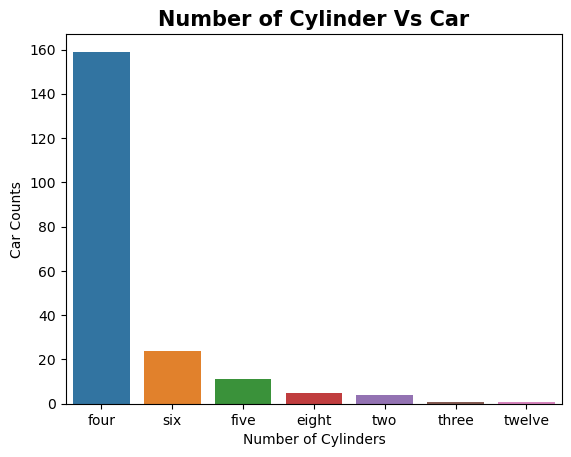

In [22]:

bar_p = sns.barplot(x = n_cylinder["num-of-cylinders"],y = n_cylinder["counts"])
#bar_p.set_xticklabels(labels= data,rotation = 90)
bar_p.set_xlabel("Number of Cylinders",fontsize= 10)
bar_p.set_ylabel("Car Counts",fontsize= 10)
bar_p.set_title("Number of Cylinder Vs Car" ,fontsize= 15,fontweight = "bold")
plt.show()

### Four cylinder car is more in number then any other numbers

In [23]:
# Car engine
engine_loc = data["engine-location"].value_counts().to_frame().reset_index()
engine_loc.columns=["engine-location","counts"]
engine_loc


,engine-location,counts
0,front,202
1,rear,3


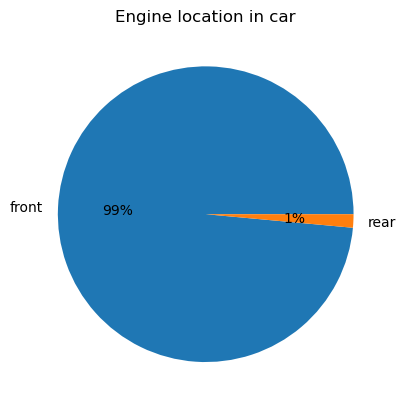

In [24]:
plt.pie(x=engine_loc["counts"], labels =engine_loc["engine-location"],autopct='%.f%%')
plt.title("Engine location in car")
plt.show()

### About 99% of the car having front engine

In [44]:
data["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [45]:
data["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [29]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("four",4)

In [30]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("six",6)

In [31]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("five",5)

In [32]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("three",3)

In [33]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("twelve",12)

In [34]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("two",2)

In [35]:
data["num-of-cylinders"] = data["num-of-cylinders"].replace("eight",8)

In [36]:
data["num-of-cylinders"] = data["num-of-cylinders"].astype("int")

In [37]:
data["num-of-doors"] = data["num-of-doors"].replace("four",4)

In [38]:
data["num-of-doors"] = data["num-of-doors"].replace("two",2)

In [39]:
data["num-of-doors"] = data["num-of-doors"].astype("int")

In [40]:
data["bore"] = data["bore"].astype("float")

In [41]:
data["stroke"] = data["stroke"].astype("float")

In [42]:
data["horsepower"] = data["horsepower"].astype("float")

In [43]:
data["peak-rpm"] = data["peak-rpm"].astype("float")

In [44]:
data["price"] = data["price"].astype("float")

In [45]:
data["normalized-losses"] = data["normalized-losses"].astype("float")

In [46]:
data.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int32
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int32
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

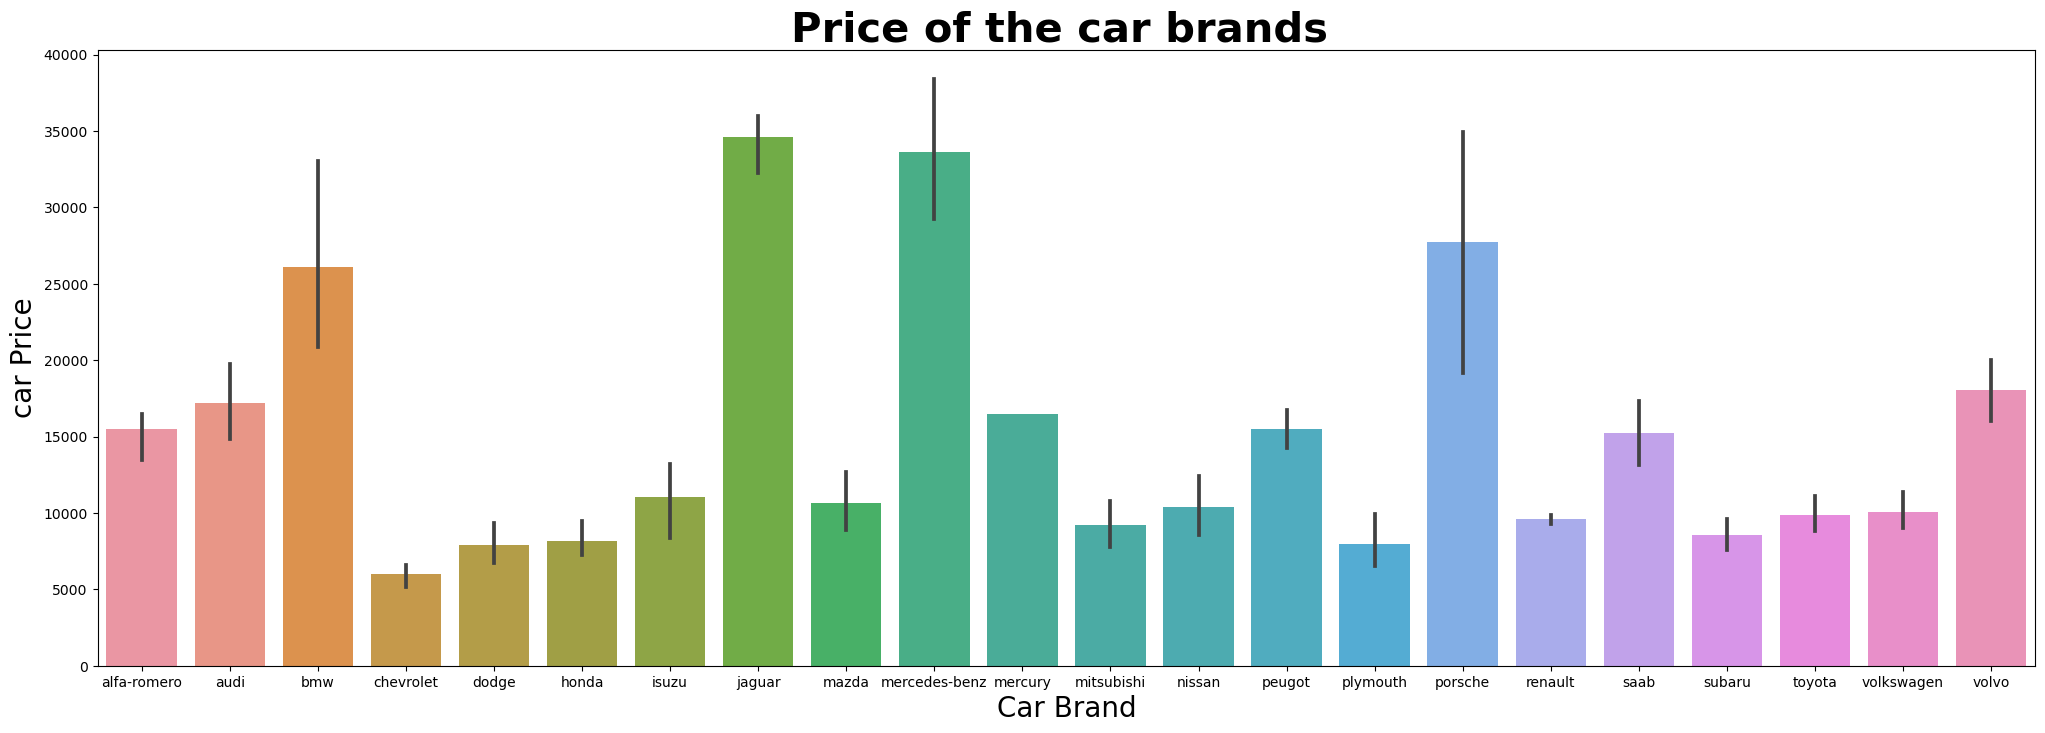

In [47]:
fig = plt.figure(figsize=(25,8))
bar_p = sns.barplot(x = data["make"],y = data["price"])
#bar_p.set_xticklabels(labels= data,rotation = 90)
bar_p.set_xlabel("Car Brand",fontsize= 20)
bar_p.set_ylabel("car Price",fontsize= 20)
bar_p.set_title("Price of the car brands ",fontsize= 30,fontweight = "bold")
plt.show()

### From the above bar plot we see that mercedes-benz and jaguar are in higher price range

In [73]:
data["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [74]:
data["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [75]:
data["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [76]:
data["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [77]:
data["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

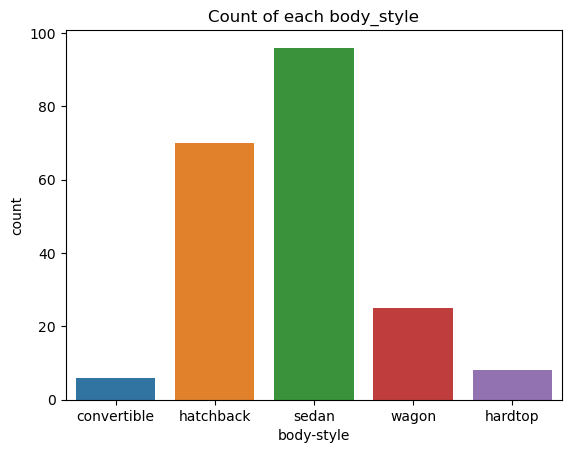

In [48]:
sns.countplot(x=data["body-style"])
plt.title("Count of each body_style")
plt.show()

### From the above barplot most of the car types are sedan types

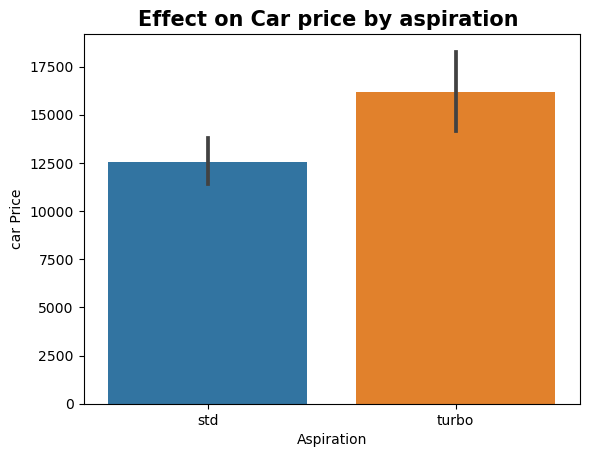

In [45]:
# barplot on how aspiration effect car price
aspi_price = sns.barplot(x = data["aspiration"],y = data["price"])
#bar_p.set_xticklabels(labels= data,rotation = 90)
aspi_price.set_xlabel("Aspiration",fontsize= 10)
aspi_price.set_ylabel("car Price",fontsize= 10)
aspi_price.set_title("Effect on Car price by aspiration ",fontsize= 15,fontweight = "bold")
plt.show()

### Turbo engine cars are more expensive

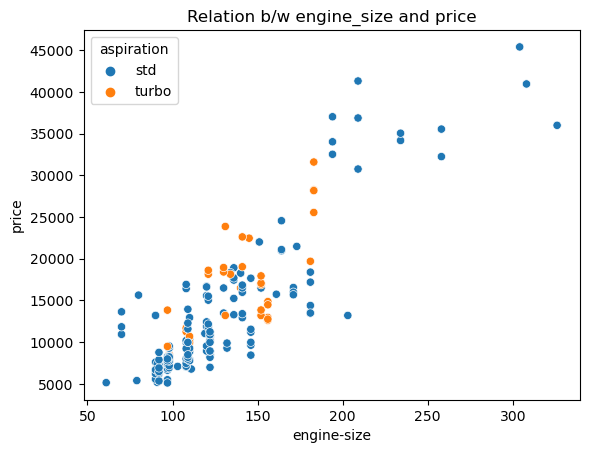

In [185]:
sns.scatterplot(x= data["engine-size"], y=data["price"], hue = data["aspiration"])
plt.title("Relation b/w engine_size and price")
plt.show()

### As we see most of engine size b/w 80 to 200 and car price b/w 5000 to 15000
### Most of turbo engine cars are 10000 to 30000 price range

In [191]:
wheel_cnt = data["drive-wheels"].value_counts().to_frame().reset_index()
wheel_cnt.columns=["drive-wheels","counts"]
wheel_cnt

,drive-wheels,counts
0,fwd,120
1,rwd,76
2,4wd,9


### Front wheel drive are more in count

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

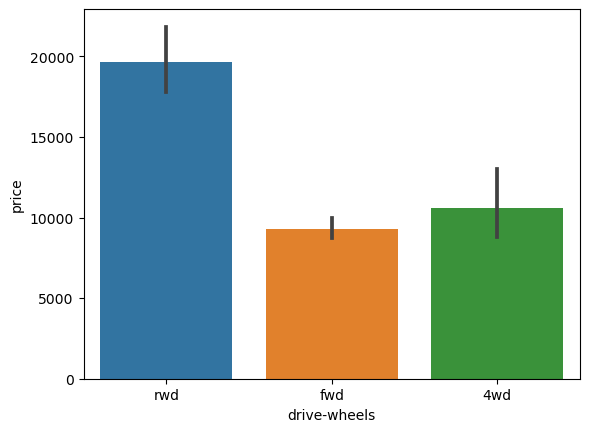

In [193]:
sns.barplot(x = data["drive-wheels"],y =data["price"])

### As we see from the above barplot rear wheel drive cars are more expensive

<AxesSubplot:xlabel='symboling', ylabel='price'>

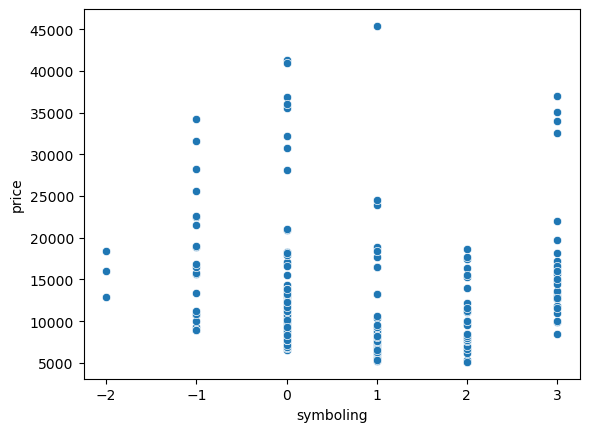

In [194]:
sns.scatterplot(x = data["symboling"],y = data["price"])

### symboling and price has no correlation between each other

## Data Preprocessing 


In [49]:
df = data.copy()
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [50]:
asp_df1 = pd.get_dummies(df,columns=["aspiration"])
asp_df1

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,gas,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0
1,3,122.0,alfa-romero,gas,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0
2,1,122.0,alfa-romero,gas,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,0
3,2,164.0,audi,gas,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,0
4,2,164.0,audi,gas,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,4,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,1,0
201,-1,95.0,volvo,gas,4,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,1
202,-1,95.0,volvo,gas,4,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,1,0
203,-1,95.0,volvo,diesel,4,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,1


In [51]:
df1 = pd.get_dummies(asp_df1,columns=["fuel-type"])


In [52]:
df2 = df1[df1["engine-location"]!="rear"]

In [53]:
df2.shape

(202, 28)

In [54]:
df2 = df2[df2["engine-type"]!="rotor"]

In [55]:
df2 = df2[df2["engine-type"]!="dohcv"]

In [56]:
df2

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,aspiration_std,aspiration_turbo,fuel-type_diesel,fuel-type_gas
0,3,122.0,alfa-romero,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111.0,5000.0,21,27,13495.0,1,0,0,1
1,3,122.0,alfa-romero,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111.0,5000.0,21,27,16500.0,1,0,0,1
2,1,122.0,alfa-romero,2,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154.0,5000.0,19,26,16500.0,1,0,0,1
3,2,164.0,audi,4,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102.0,5500.0,24,30,13950.0,1,0,0,1
4,2,164.0,audi,4,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115.0,5500.0,18,22,17450.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,4,sedan,rwd,front,109.1,188.8,68.9,...,9.5,114.0,5400.0,23,28,16845.0,1,0,0,1
201,-1,95.0,volvo,4,sedan,rwd,front,109.1,188.8,68.8,...,8.7,160.0,5300.0,19,25,19045.0,0,1,0,1
202,-1,95.0,volvo,4,sedan,rwd,front,109.1,188.8,68.9,...,8.8,134.0,5500.0,18,23,21485.0,1,0,0,1
203,-1,95.0,volvo,4,sedan,rwd,front,109.1,188.8,68.9,...,23.0,106.0,4800.0,26,27,22470.0,0,1,1,0


In [57]:
df = pd.get_dummies(df2,columns=["make","body-style","drive-wheels"])

In [58]:
df["engine-location"] = df["engine-location"].replace("front",1)

In [59]:
df = pd.get_dummies(df,columns=["engine-type"])

In [60]:
df = df.drop(["fuel-system"],axis= 1)

In [61]:
df.head(3)

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv
0,3,122.0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,1,1,0,0,0,0
1,3,122.0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,1,1,0,0,0,0
2,1,122.0,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,1,0,0,0,0,1


In [62]:
# spliting the data into X and y
X = df.drop(["price"], axis = 1)
y = df["price"]

In [63]:
X

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv
0,3,122.0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,1,1,0,0,0,0
1,3,122.0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,1,1,0,0,0,0
2,1,122.0,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,1,0,0,0,0,1
3,2,164.0,4,1,99.8,176.6,66.2,54.3,2337,4,...,1,0,0,1,0,0,0,1,0,0
4,2,164.0,4,1,99.4,176.6,66.4,54.3,2824,5,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,4,1,109.1,188.8,68.9,55.5,2952,4,...,1,0,0,0,1,0,0,1,0,0
201,-1,95.0,4,1,109.1,188.8,68.8,55.5,3049,4,...,1,0,0,0,1,0,0,1,0,0
202,-1,95.0,4,1,109.1,188.8,68.9,55.5,3012,6,...,1,0,0,0,1,0,0,0,0,1
203,-1,95.0,4,1,109.1,188.8,68.9,55.5,3217,6,...,1,0,0,0,1,0,0,1,0,0


## Scaling the data

In [64]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)
X = pd.DataFrame(X_ss)
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.874262,0.017774,-1.196703,0.0,-1.729294,-0.433189,-0.841280,-2.118595,-0.005911,-0.388079,...,-0.974933,-0.381246,-0.218797,-1.248376,1.377338,3.926406,-0.254686,-1.737932,-0.254686,-0.265805
1,1.874262,0.017774,-1.196703,0.0,-1.729294,-0.433189,-0.841280,-2.118595,-0.005911,-0.388079,...,-0.974933,-0.381246,-0.218797,-1.248376,1.377338,3.926406,-0.254686,-1.737932,-0.254686,-0.265805
2,0.203540,0.017774,-1.196703,0.0,-0.745371,-0.241436,-0.184543,-0.610508,0.517353,1.623802,...,-0.974933,-0.381246,-0.218797,-1.248376,1.377338,-0.254686,-0.254686,-1.737932,-0.254686,3.762160
3,1.038901,1.330846,0.835629,0.0,0.138493,0.190009,0.143825,0.185428,-0.407398,-0.388079,...,1.025711,-0.381246,-0.218797,0.801041,-0.726038,-0.254686,-0.254686,0.575396,-0.254686,-0.265805
4,1.038901,1.330846,0.835629,0.0,0.071786,0.190009,0.237644,0.185428,0.519256,0.617862,...,1.025711,-0.381246,4.570436,-1.248376,-0.726038,-0.254686,-0.254686,0.575396,-0.254686,-0.265805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-1.467182,-0.826343,0.835629,0.0,1.689423,1.164756,1.410388,0.688124,0.762811,-0.388079,...,1.025711,-0.381246,-0.218797,-1.248376,1.377338,-0.254686,-0.254686,0.575396,-0.254686,-0.265805
193,-1.467182,-0.826343,0.835629,0.0,1.689423,1.164756,1.363478,0.688124,0.947381,-0.388079,...,1.025711,-0.381246,-0.218797,-1.248376,1.377338,-0.254686,-0.254686,0.575396,-0.254686,-0.265805
194,-1.467182,-0.826343,0.835629,0.0,1.689423,1.164756,1.410388,0.688124,0.876978,1.623802,...,1.025711,-0.381246,-0.218797,-1.248376,1.377338,-0.254686,-0.254686,-1.737932,-0.254686,3.762160
195,-1.467182,-0.826343,0.835629,0.0,1.689423,1.164756,1.410388,0.688124,1.267048,1.623802,...,1.025711,-0.381246,-0.218797,-1.248376,1.377338,-0.254686,-0.254686,0.575396,-0.254686,-0.265805


In [73]:
pca = PCA()
pca_df = pca.fit_transform(X)

In [74]:
pca.explained_variance_

array([1.02154990e+01, 5.22097741e+00, 3.71133999e+00, 3.01183598e+00,
       2.56709006e+00, 2.34699926e+00, 1.96051944e+00, 1.79899239e+00,
       1.69830710e+00, 1.55321211e+00, 1.49819101e+00, 1.36437836e+00,
       1.28392537e+00, 1.24238284e+00, 1.18893800e+00, 1.13629865e+00,
       1.09483678e+00, 1.06737358e+00, 1.06465969e+00, 1.04787181e+00,
       1.03430298e+00, 9.97488037e-01, 9.70591530e-01, 8.86737520e-01,
       8.51719003e-01, 7.40619817e-01, 6.95683176e-01, 6.31085966e-01,
       5.78790669e-01, 4.78005824e-01, 4.20790337e-01, 2.91347426e-01,
       2.61468731e-01, 2.46198173e-01, 1.90315439e-01, 1.74909427e-01,
       1.55501597e-01, 1.15373608e-01, 1.13967785e-01, 8.67534861e-02,
       7.81633767e-02, 5.42724636e-02, 4.77232063e-02, 3.54850670e-02,
       2.67148129e-02, 1.72966983e-02, 1.55306233e-02, 1.15336540e-02,
       3.71503101e-03, 2.01465195e-30, 1.22216500e-31, 7.87559110e-32,
       7.19201394e-32, 4.15720667e-32, 3.71754722e-32, 3.71754722e-32,
      

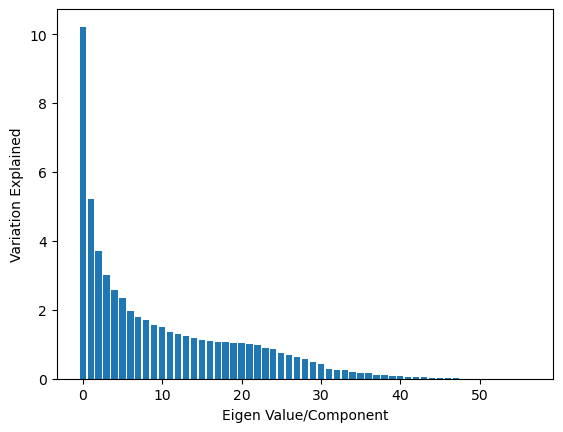

In [75]:
plt.bar(range(57),pca.explained_variance_)
plt.xlabel("Eigen Value/Component")
plt.ylabel("Variation Explained")
plt.show()

In [76]:
pca.explained_variance_ratio_ 

array([1.81493637e-01, 9.27584819e-02, 6.59375125e-02, 5.35097763e-02,
       4.56081991e-02, 4.16979564e-02, 3.48315636e-02, 3.19617937e-02,
       3.01729687e-02, 2.75951389e-02, 2.66176069e-02, 2.42402247e-02,
       2.28108568e-02, 2.20727916e-02, 2.11232639e-02, 2.01880471e-02,
       1.94514149e-02, 1.89634899e-02, 1.89152737e-02, 1.86170119e-02,
       1.83759412e-02, 1.77218687e-02, 1.72440120e-02, 1.57542199e-02,
       1.51320635e-02, 1.31582201e-02, 1.23598534e-02, 1.12121872e-02,
       1.02830829e-02, 8.49248925e-03, 7.47597045e-03, 5.17622330e-03,
       4.64538355e-03, 4.37407921e-03, 3.38123877e-03, 3.10752788e-03,
       2.76271873e-03, 2.04978491e-03, 2.02480836e-03, 1.54130559e-03,
       1.38868943e-03, 9.64231587e-04, 8.47874223e-04, 6.30445352e-04,
       4.74628656e-04, 3.07301746e-04, 2.75924779e-04, 2.04912634e-04,
       6.60030890e-05, 3.57933087e-32, 2.17135914e-33, 1.39921669e-33,
       1.27776897e-33, 7.38590017e-34, 6.60477932e-34, 6.60477932e-34,
      

In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18149364, 0.27425212, 0.34018963, 0.39369941, 0.43930761,
       0.48100556, 0.51583713, 0.54779892, 0.57797189, 0.60556703,
       0.63218464, 0.65642486, 0.67923572, 0.70130851, 0.72243177,
       0.74261982, 0.76207123, 0.78103472, 0.79995   , 0.81856701,
       0.83694295, 0.85466482, 0.87190883, 0.88766305, 0.90279511,
       0.91595333, 0.92831319, 0.93952538, 0.94980846, 0.95830095,
       0.96577692, 0.97095314, 0.97559853, 0.9799726 , 0.98335384,
       0.98646137, 0.98922409, 0.99127387, 0.99329868, 0.99483999,
       0.99622868, 0.99719291, 0.99804078, 0.99867123, 0.99914586,
       0.99945316, 0.99972908, 0.999934  , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

### From the above plot and np.cumsum() values we see that with 48 features we can explained the 99% of varience in data

In [78]:
# principal component analysis with 48 components
pca = PCA(n_components = 48)
pca_X = pca.fit_transform(X)

In [79]:
pca_X.shape

(197, 48)

In [80]:
pca_X = pd.DataFrame(pca_X)
pca_X

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.077906,-4.485161,0.248646,4.509828,-3.998895,2.457029,1.474663,6.268236,-3.563717,-1.654226,...,-0.757690,-0.142579,0.280007,-0.030738,-0.101306,-0.005890,0.091148,0.011209,0.099983,-0.029207
1,0.077906,-4.485161,0.248646,4.509828,-3.998895,2.457029,1.474663,6.268236,-3.563717,-1.654226,...,-0.757690,-0.142579,0.280007,-0.030738,-0.101306,-0.005890,0.091148,0.011209,0.099983,-0.029207
2,1.370789,-4.068652,-0.946489,1.879137,-3.104202,0.285951,-0.083228,0.660215,-2.420888,-2.420893,...,1.604286,0.653544,-0.312747,0.135346,0.154660,0.025425,-0.152945,0.006236,-0.200775,0.065942
3,-0.645656,-0.453706,-0.339138,-1.836051,1.369542,0.343898,-2.053346,0.891862,-0.275889,2.222722,...,-0.236223,-0.100236,0.051027,0.166014,0.281924,0.148507,-0.186315,-0.262873,-0.156446,0.171420
4,1.088671,-1.411509,1.069285,-1.206700,1.836057,-0.457355,-1.757884,1.128770,-0.055802,2.765239,...,-0.548196,0.317349,0.083382,0.340708,0.103344,0.228358,-0.151545,0.010203,0.046929,0.122648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3.077135,0.717927,1.380936,-2.533181,0.943269,0.754088,1.847788,0.949145,1.124811,-1.459349,...,0.059296,0.090710,-0.074882,0.018829,-0.217703,0.216355,0.064227,0.093171,-0.002890,0.043528
193,4.249535,0.813065,0.627734,-1.370351,3.096625,-0.086899,1.743769,1.527082,1.070578,-2.348466,...,0.086515,-0.010205,0.277382,0.072292,0.003503,0.452029,0.012549,-0.106525,-0.246261,0.030777
194,4.859848,-1.085843,1.866972,-2.296001,-0.614595,0.017720,-0.000908,-0.341783,0.271052,-2.604391,...,0.016556,-0.502210,-0.791319,0.364482,-0.285619,-0.002011,0.076431,-0.084465,0.002512,-0.215149
195,4.247347,4.683404,-2.154612,-0.308234,0.476485,-1.536373,0.808153,1.790714,0.593092,-2.530662,...,0.743053,0.783829,-0.250365,0.513885,-0.070067,-0.131491,0.161711,0.275618,0.102896,0.081606


## Training the model without PCA

In [65]:
X.shape

(197, 57)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [67]:
X_train.shape

(157, 57)

In [125]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
print("lr R2 Score :", r2_score(y_train,y_pred))
print("lr MSE :", mean_squared_error(y_train,y_pred))
print("lr MAE :", mean_absolute_error(y_test,y_test_pred))

lr R2 Score : 0.9593928033040146
lr MSE : 2416288.7498321994
lr MAE : 2317.344966644053


In [126]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_train)
print("dtr R2 Score :", r2_score(y_train,y_pred))
print("dtr MSE :", mean_squared_error(y_train,y_pred))
print("dtr MAE :", mean_absolute_error(y_test,y_test_pred))

dtr R2 Score : 0.9993527955075941
dtr MSE : 38511.22611464968
dtr MAE : 2317.344966644053


In [127]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_train)
print("gbr R2 Score :", r2_score(y_train,y_pred))
print("gbr MSE :", mean_squared_error(y_train,y_pred))
print("gbr MAE :", mean_absolute_error(y_test,y_test_pred))

gbr R2 Score : 0.9939074715686185
gbr MSE : 362529.5293589049
gbr MAE : 2317.344966644053


In [128]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_train)
print("rfr R2 Score :", r2_score(y_train,y_pred))
print("rfr MSE :", mean_squared_error(y_train,y_pred))
print("rfr MAE :", mean_absolute_error(y_test,y_test_pred))

rfr R2 Score : 0.9857601491394159
rfr MSE : 847327.425513203
rfr MAE : 2317.344966644053


In [129]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_train)
print("svr R2 Score :", r2_score(y_train,y_pred))
print("svr MSE :", mean_squared_error(y_train,y_pred))
print("svr MAE :", mean_absolute_error(y_test,y_test_pred))

svr R2 Score : -0.10951971980205566
svr MSE : 66020809.97479253
svr MAE : 2317.344966644053


## Training the model with PCA

In [114]:
pca_X.shape

(197, 48)

In [104]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(pca_X,y, test_size = 0.2, random_state = 2)

In [92]:
X_train1.shape

(157, 48)

In [115]:
lr = LinearRegression()
lr.fit(X_train1,y_train1)
y_pred=lr.predict(X_train1)
print("lr R2 Score :", r2_score(y_train1,y_pred))
print("lr MSE :", mean_squared_error(y_train1,y_pred))


lr R2 Score : 0.9593928033040179
lr MSE : 2416288.749831998


In [116]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)
y_pred=dtr.predict(X_train1)
print("dtr R2 Score :", r2_score(y_train1,y_pred))
print("dtr MSE :", mean_squared_error(y_train1,y_pred))


dtr R2 Score : 0.9993527955075941
dtr MSE : 38511.22611464968


In [117]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train1,y_train1)
y_pred=gbr.predict(X_train1)
print("gbr R2 Score :", r2_score(y_train1,y_pred))
print("gbr MSE :", mean_squared_error(y_train1,y_pred))

gbr R2 Score : 0.998403758844937
gbr MSE : 94982.6596963587


In [118]:
rfr = RandomForestRegressor()
rfr.fit(X_train1,y_train1)
y_pred=rfr.predict(X_train1)
print("rfr R2 Score :", r2_score(y_train1,y_pred))
print("rfr MSE :", mean_squared_error(y_train1,y_pred))


rfr R2 Score : 0.9748803450800081
rfr MSE : 1494718.781925769


In [119]:
svr = SVR()
svr.fit(X_train1,y_train1)
y_pred=svr.predict(X_train1)
print("svr R2 Score :", r2_score(y_train1,y_pred))
print("svr MSE :", mean_squared_error(y_train1,y_pred))


svr R2 Score : -0.10951964940814762
svr MSE : 66020805.78607669


### AS we see from the above R2 Score both with PCA and without PCA both are giving same score

## Hyperparameters Tuning

### Decision Tree Regressor

In [81]:
# setting the params for Decision Tree Regressor
params = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
}

In [82]:
tuned_dtr = GridSearchCV(estimator = dtr, param_grid = params, n_jobs = 1, cv = 3)
tuned_dtr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]})

In [87]:
tuned_dtr.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [88]:
tuned_dtr.best_score_

0.7900252692659434

In [123]:
# training the model with best params
dtr =DecisionTreeRegressor(max_depth= 80,
                           max_features= 3,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           )
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_train)
# metrics for train data
print("dtr R2 Score :", r2_score(y_train,y_pred))
print("dtr MSE :", mean_squared_error(y_train,y_pred))
print("dtr MAE :", mean_absolute_error(y_test,y_test_pred))

dtr R2 Score : 0.830159815401839
dtr MSE : 10106162.47130725
dtr MAE : 2975.161572893744


In [124]:
# metrics for test data
y_test_pred = dtr.predict(X_test)
print("dtr R2 Score :", r2_score(y_test,y_test_pred))
print("dtr MSE :", mean_squared_error(y_test,y_test_pred))
print("dtr MAE :", mean_absolute_error(y_test,y_test_pred))

dtr R2 Score : 0.7602351381397989
dtr MSE : 10692999.401283925
dtr MAE : 2317.344966644053


### Gradient Booster Regressor

In [97]:
# setting params for Gradient Booster Regression
param_grid1 ={'n_estimators':[200,300,500],
              'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],
              'subsample':[.5,.75,1],
              'random_state':[1]
             }

In [98]:
tuned_gbr = GridSearchCV(estimator = gbr, param_grid = param_grid1, n_jobs = 1, cv = 3)
tuned_gbr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [200, 300, 500], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]})

In [99]:
tuned_gbr.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.5}

In [100]:
tuned_gbr.best_score_

0.8882005959935827

In [117]:
# training the model with best params
gbr = GradientBoostingRegressor(learning_rate= 0.01,
                                max_depth= 4,
                                n_estimators= 500,
                                random_state= 1,
                                subsample= 0.5)
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_train)
# metrics for train data
print("gbr R2 Score :", r2_score(y_train,y_pred))
print("gbr MSE :", mean_squared_error(y_train,y_pred))
print("gbr MAE :", mean_absolute_error(y_test,y_test_pred))

gbr R2 Score : 0.9917981375239641
gbr MSE : 488043.24457284354
gbr MAE : 1882.2091252991274


In [118]:
# metrics for test data
y_test_pred = gbr.predict(X_test)
print("gbr R2 Score :", r2_score(y_test,y_test_pred))
print("gbr MSE :", mean_squared_error(y_test,y_test_pred))
print("gbr MAE :", mean_absolute_error(y_test,y_test_pred))

gbr R2 Score : 0.8283865124252938
gbr MSE : 7653594.048983475
gbr MAE : 1882.2091252991274


### Random Forest Regressor

In [103]:
# setting the params for Random Forest Regressor
param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [104]:
tuned_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
tuned_rfr.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [254]:
tuned_rfr.best_params_

{'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [105]:
tuned_rfr.best_score_

0.7834608392550186

In [120]:
# training the model with best params
rfr =RandomForestRegressor(max_depth= 100,
                           max_features= 3,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_train)
# metrics for the train data
print("rfr R2 Score :", r2_score(y_train,y_pred))
print("rfr MSE :", mean_squared_error(y_train,y_pred))
print("rfr MAE :", mean_absolute_error(y_test,y_test_pred))

rfr R2 Score : 0.8973543543233284
rfr MSE : 6107821.742157431
rfr MAE : 2220.020570257193


In [119]:
# metrics for the test data
y_test_pred = rfr.predict(X_test)
print("rfr R2 Score :", r2_score(y_test,y_test_pred))
print("rfr MSE :", mean_squared_error(y_test,y_test_pred))
print("rfr MAE :", mean_absolute_error(y_test,y_test_pred))

rfr R2 Score : 0.8163139622883351
rfr MSE : 8192003.932670848
rfr MAE : 2220.020570257193


## Final Model

In [116]:
# Final model as Gradient Booster Regressor
gbr = GradientBoostingRegressor(learning_rate= 0.01,
                                max_depth= 4,
                                n_estimators= 500,
                                random_state= 1,
                                subsample= 0.5)
gbr.fit(X_train,y_train)
y_test_pred = gbr.predict(X_test)
print("gbr R2 Score :", r2_score(y_test,y_test_pred))
print("gbr MSE :", mean_squared_error(y_test,y_test_pred))
print("gbr MAE :", mean_absolute_error(y_test,y_test_pred))

gbr R2 Score : 0.8283865124252938
gbr MSE : 7653594.048983475
gbr MAE : 1882.2091252991274


### The Final Model that we see is Gardient Booster Regressor it has the 
### R2 Score of 83%
### Mean Squared Error of 7653594.048983475
### Mean Absolute Error of 1882.2091252991274